In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the data set

In [11]:
# Update the path below to the actual location of your car_data.csv file
df = pd.read_csv('../../data/raw/car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
df.drop(columns=['torque'], inplace=True)

In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [14]:
df.shape

(8128, 12)

### Explore data shape, types, nulls

In [15]:
df.info()
df.describe()
#null checks
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

### Visualize key relationships

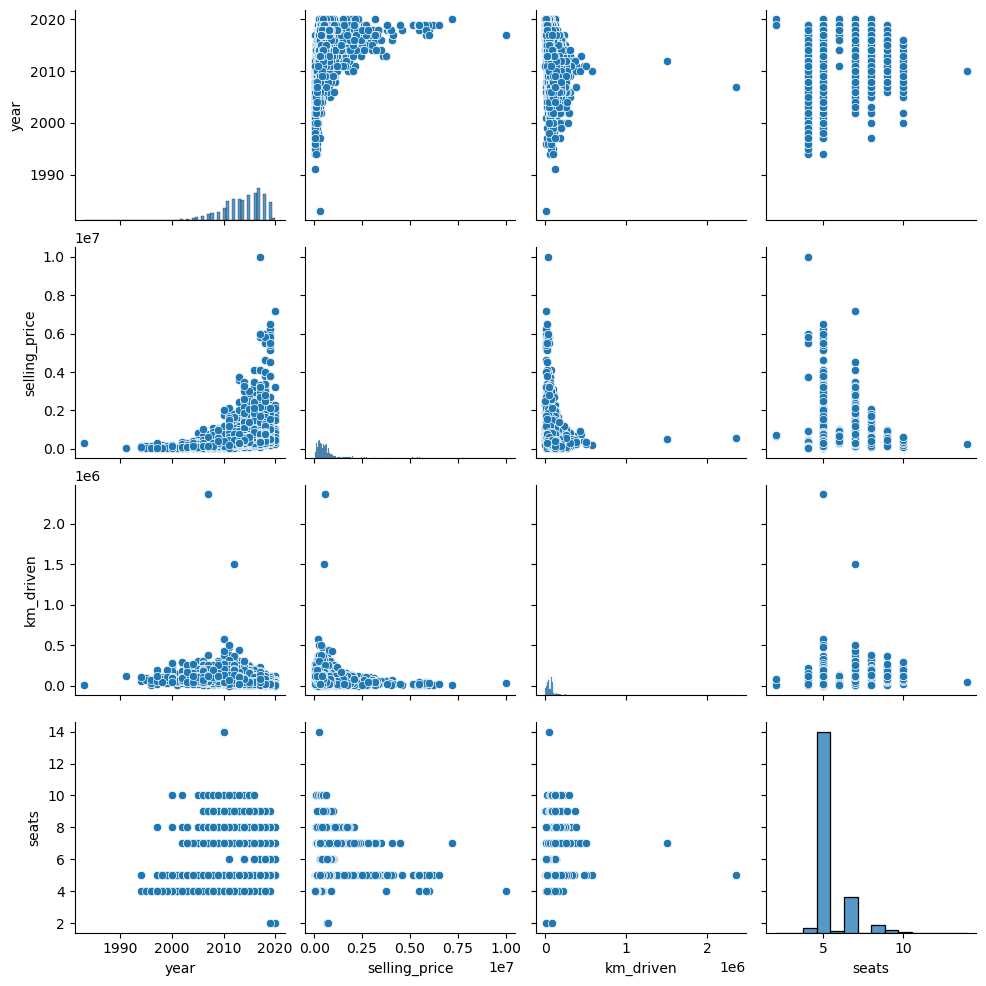

In [17]:
sns.pairplot(df)
plt.savefig('../../reports/figures/Random_forest_figures/histograms_numerictdata.png')



In [18]:
numeric_df = df.select_dtypes(include=['number'])

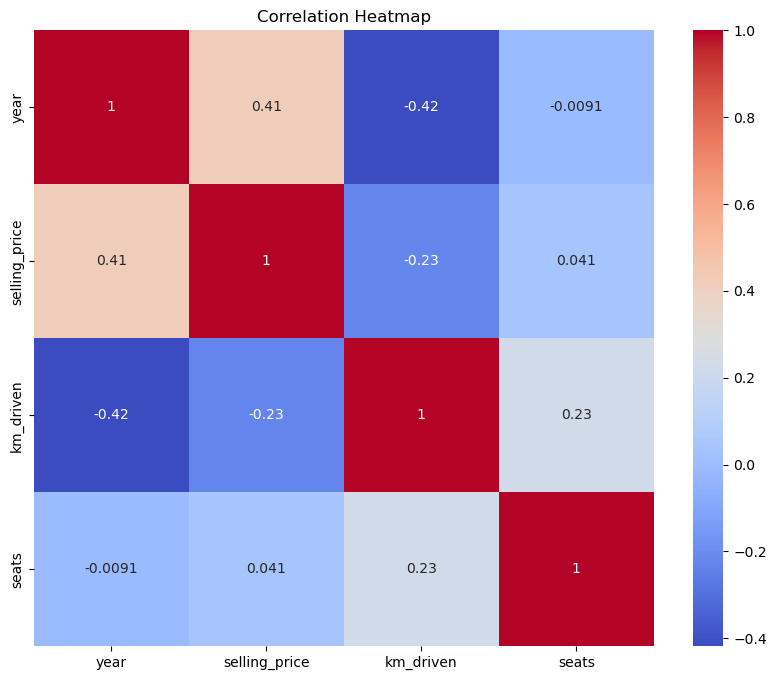

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig('../../reports/figures/Random_forest_figures/correlation-heatmap_numerictdata.png')
plt.show()

### Visualize non numeric data

In [20]:
print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


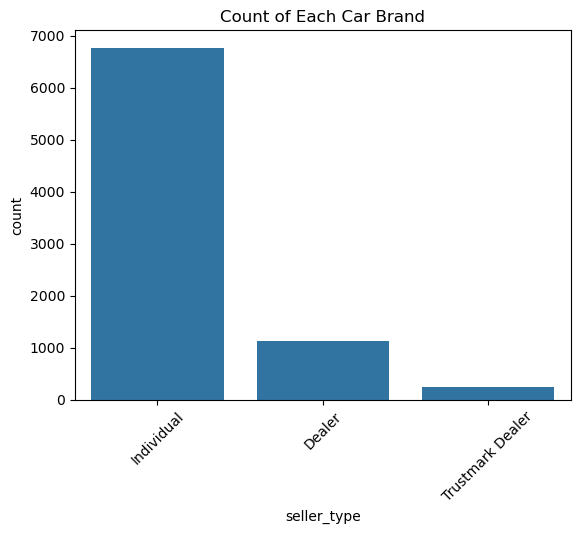

In [21]:
sns.countplot(x='seller_type', data=df)
plt.xticks(rotation=45)
plt.title("Count of Each Car Brand")
plt.savefig('../../reports/figures/Random_forest_figures/countplot_seller_type.png')
plt.show()

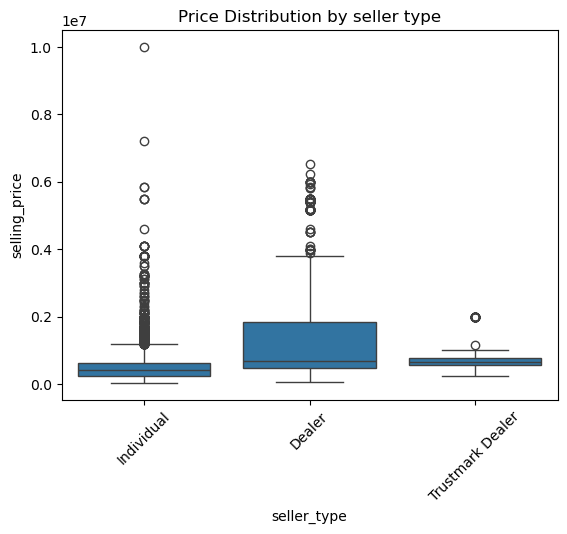

In [22]:
#Price distribution for each seller type
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by seller type")
plt.savefig('../../reports/figures/Random_forest_figures/price vs seller_type.png')
plt.show()


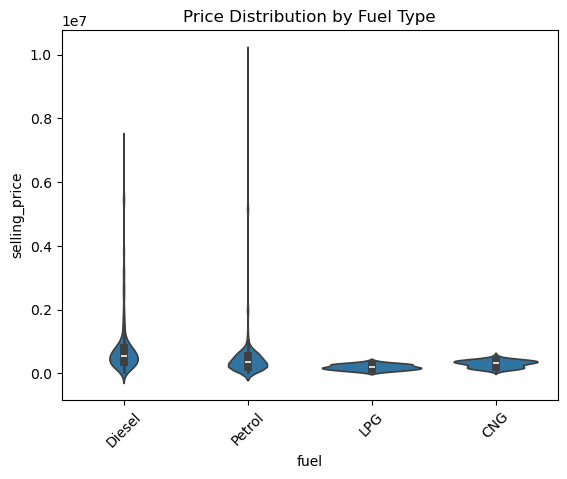

In [23]:
sns.violinplot(x='fuel', y='selling_price', data=df)
plt.title("Price Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.savefig('../../reports/figures/Random_forest_figures/price vs fuel_type.png')
plt.show()


### Data Pre Processing

In [24]:
df['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'],
      shape=(2058,), dtype=object)

In [25]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [27]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [28]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [29]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [30]:
def clean_numeric_column(series, unit_pattern):
    return series.str.extract(r'([\d.]+)').astype(float)

def get_brand_name(name):
    return name.split(' ')[0]

In [31]:
def load_and_clean_data(input_path, output_path): 
    df = pd.read_csv(input_path)

    # Drop duplicates
    df = df.drop_duplicates()

    # Convert 'name' to brand name before encoding
    df['brand'] = df['name'].apply(get_brand_name)
    df.drop(columns=['name', 'torque'], inplace=True)  # Drop name and torque

    # Clean numeric columns
    df['mileage'] = clean_numeric_column(df['mileage'], r'kmpl|km/kg')
    df['engine'] = clean_numeric_column(df['engine'], r'CC')
    df['max_power'] = clean_numeric_column(df['max_power'], r'bhp')

    # Fill missing numeric values
    for col in ['mileage', 'engine', 'max_power', 'seats']:
        df[col] = df[col].fillna(df[col].median())

    # Encode categorical columns (now includes 'brand')
    cat_columns = ['brand','fuel', 'seller_type', 'transmission', 'owner']
    df[cat_columns] = df[cat_columns].apply(lambda col: col.astype('category').cat.codes)

    # Save cleaned data
    df.to_csv(output_path, index=False)
    return df

In [55]:
df_cleaned = load_and_clean_data('../../data/raw/car_data.csv', '../../data/processed/cleaned-random_forest_car_data-FC212027.csv')
df_cleaned.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,20
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,27
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,10
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,11
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,20


In [33]:
df_cleaned['brand'].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25],
      dtype=int8)

In [34]:
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])
brand_codes = df['brand'].astype('category').cat.categories

# Show all mappings
for i, brand in enumerate(brand_codes):
    print(f"{i}: {brand}")

0: Ambassador
1: Ashok
2: Audi
3: BMW
4: Chevrolet
5: Daewoo
6: Datsun
7: Fiat
8: Force
9: Ford
10: Honda
11: Hyundai
12: Isuzu
13: Jaguar
14: Jeep
15: Kia
16: Land
17: Lexus
18: MG
19: Mahindra
20: Maruti
21: Mercedes-Benz
22: Mitsubishi
23: Nissan
24: Opel
25: Peugeot
26: Renault
27: Skoda
28: Tata
29: Toyota
30: Volkswagen
31: Volvo


In [35]:
df['fuel'] = df['fuel'].apply(lambda x: x.split(' ')[0])
brand_codes = df['fuel'].astype('category').cat.categories

# Show all mappings
for i, brand in enumerate(brand_codes):
    print(f"{i}: {brand}")

0: CNG
1: Diesel
2: LPG
3: Petrol


In [36]:
df['transmission'] = df['transmission'].apply(lambda x: x.split(' ')[0])
brand_codes = df['transmission'].astype('category').cat.categories

# Show all mappings
for i, brand in enumerate(brand_codes):
    print(f"{i}: {brand}")

0: Automatic
1: Manual


In [37]:
df['seller_type'] = df['seller_type'].apply(lambda x: x.split(' ')[0])
brand_codes = df['seller_type'].astype('category').cat.categories

# Show all mappings
for i, brand in enumerate(brand_codes):
    print(f"{i}: {brand}")

0: Dealer
1: Individual
2: Trustmark


In [38]:
df['owner'] = df['owner'].apply(lambda x: x.split(' ')[0])
brand_codes = df['owner'].astype('category').cat.categories

# Show all mappings
for i, brand in enumerate(brand_codes):
    print(f"{i}: {brand}")

0: First
1: Fourth
2: Second
3: Test
4: Third


### Model Training with random forest algorithm

In [39]:
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

In [40]:
# Load the cleaned data
df_cleaned.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,20
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,27
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,10
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,11
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,20


In [41]:
#Check colomns and rename target column
if 'selling_price' in df_cleaned.columns:
    df_cleaned = df_cleaned.rename(columns={'selling_price': 'price'})

df_cleaned.columns


Index(['year', 'price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'brand'],
      dtype='object')

In [42]:
#Separate Features and Target
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

In [43]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [44]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
#Define the Random Forest Model
rf = RandomForestRegressor(random_state=42)

In [46]:
#Set Up Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


In [47]:
#Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None,

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [48]:
#Best Model
best_model = grid_search.best_estimator_

In [49]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([ 620994.99      , 1103187.3525    ,  837916.66666667, ...,
        283357.91666667,  631516.66666667,  715277.5       ],
      shape=(1386,))

In [50]:
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

results.head(10)  # Show first 10 rows


,Actual Price,Predicted Price
8077,550000,6.209950e+05
4094,1225000,1.103187e+06
6493,850000,8.379167e+05
4339,80000,1.265300e+05
2535,825000,7.011000e+05
7025,800000,9.154000e+05
3063,229999,2.976200e+05
1456,93150,2.344466e+05
7540,300000,2.347300e+05
3289,493000,5.165500e+05


In [51]:
df_cleaned.head()

,year,price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,20
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,27
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,10
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,11
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,20


In [52]:
import pandas as pd

input_data_model = pd.DataFrame([{
    'year': 2018,
    'km_driven': 45000,
    'fuel': 1,             # e.g., 1 = Petrol
    'seller_type': 0,      # e.g., 0 = Dealer
    'transmission': 1,     # e.g., 1 = Manual
    'owner': 0,            # e.g., 0 = First Owner
    'mileage': 18.5,       # in kmpl
    'engine': 1197.0,      # in CC
    'max_power': 82.0,     # in bhp
    'seats': 5.0,
    'brand': 20            # e.g., 20 = Maruti (encoded)
}])


In [53]:
input_scaled = scaler.transform(input_data_model.to_numpy())  # strip names
predicted_price = best_model.predict(input_scaled)
print(f"💰 Predicted Price: ₹{predicted_price[0]:,.0f}")

💰 Predicted Price: ₹597,467


/opt/miniforge/envs/car_price_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
import os

model_dir = '../../models/FC212027-random_forest'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(best_model, os.path.join(model_dir, 'car_price_model.pkl'))

['../../models/FC212027-random_forest/car_price_model.pkl']

In [62]:
joblib.dump(scaler, '../../models/FC212027-random_forest/scaler.pkl')

['../../models/FC212027-random_forest/scaler.pkl']